In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

In [53]:
# Read the CSV data
df = pd.read_csv('D:\\Work\\Projects\\Intro2DS-ITJobTrendAnalysis\\data\\processed\\merged_data.csv')

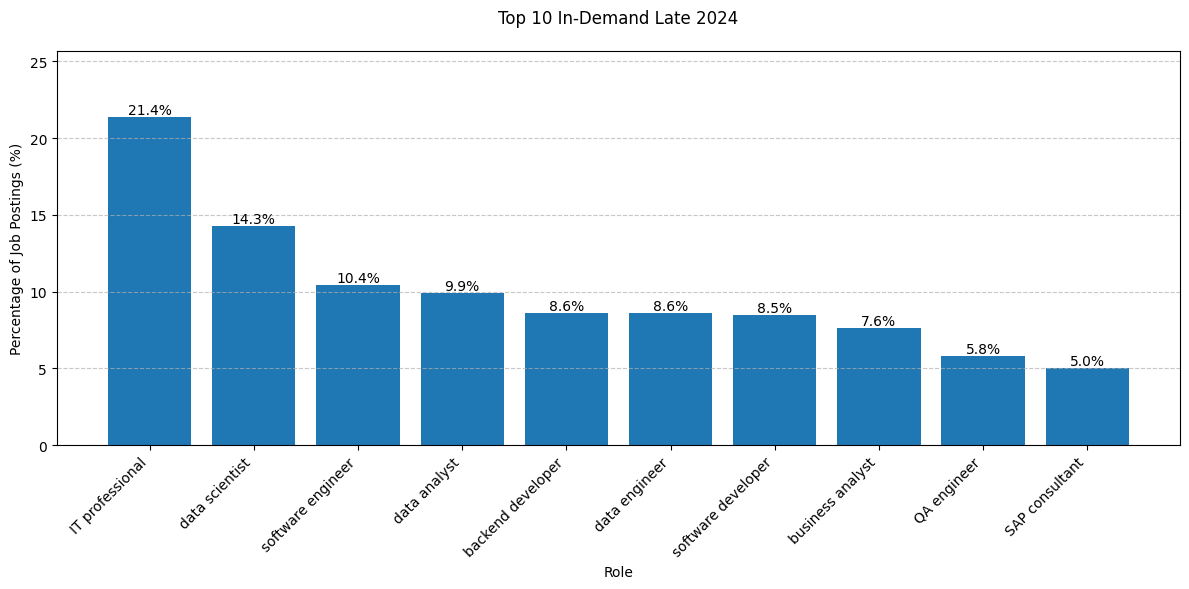


Detailed Percentage Breakdown:
IT professional: 21.4%
data scientist: 14.3%
software engineer: 10.4%
data analyst: 9.9%
backend developer: 8.6%
data engineer: 8.6%
software developer: 8.5%
business analyst: 7.6%
QA engineer: 5.8%
SAP consultant: 5.0%


In [ ]:
# Count the frequency of each job title
job_counts = df['Role'].value_counts().head(10)

# Calculate percentages
total_jobs = job_counts.sum()
job_percentages = (job_counts / total_jobs * 100).round(1)

# Create a color palette
colors = plt.cm.Spectral(np.linspace(0, 1, len(job_percentages)))

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(job_percentages.index, job_percentages.values)
plt.title('Top 10 In-Demand Late 2024', pad=20)
plt.xlabel('Role')
plt.ylabel('Percentage of Job Postings (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%',
             ha='center', va='bottom')

# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis to show percentages from 0 to 100
plt.ylim(0, max(job_percentages.values) * 1.2)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print detailed breakdown
print("\nDetailed Percentage Breakdown:")
for role, percentage in job_percentages.items():
    print(f"{role}: {percentage}%")

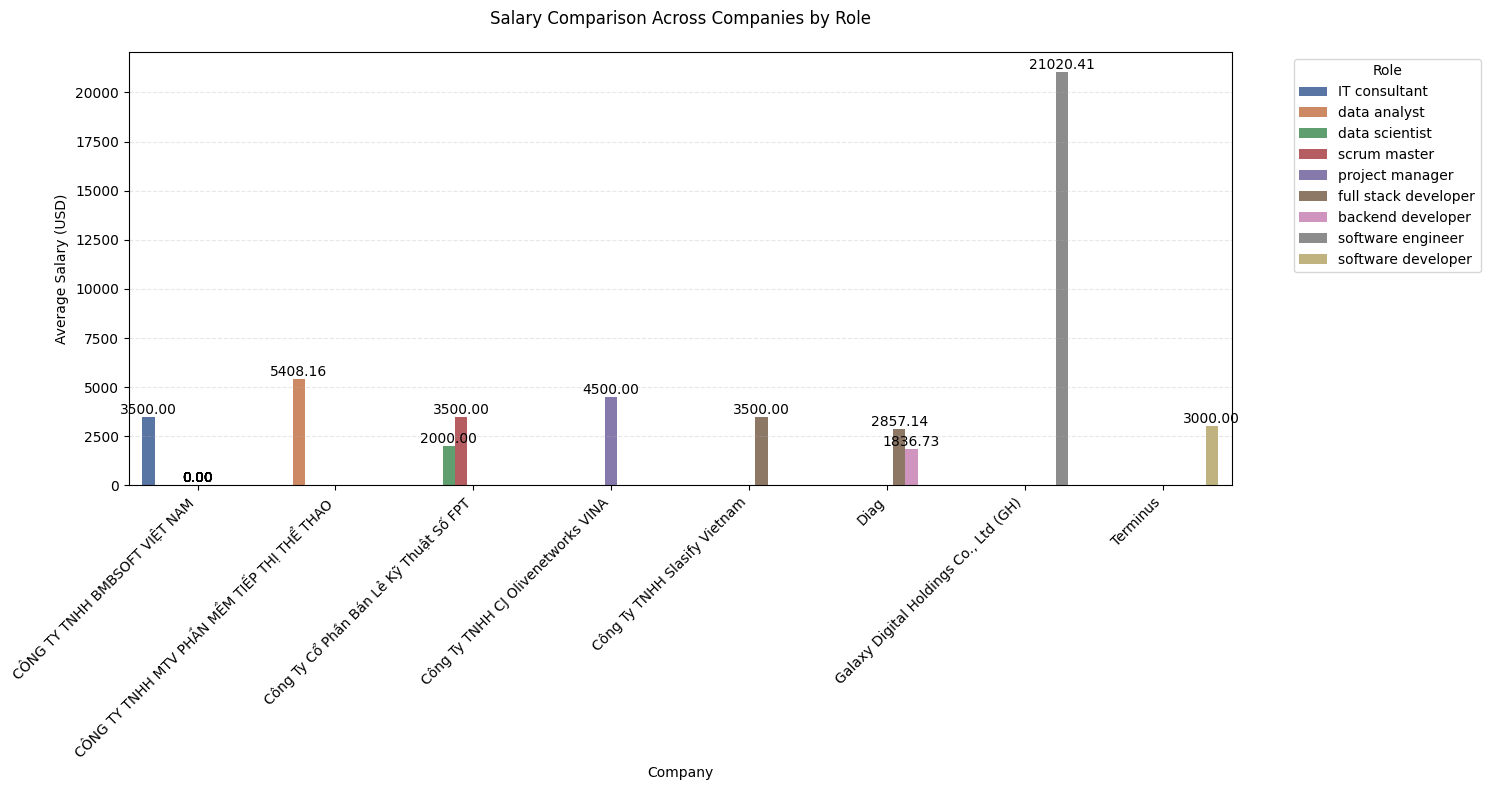


Detailed Salary Analysis by Company and Role:
                                             Average Salary  Min Salary  \
Company                                                                   
Galaxy Digital Holdings Co., Ltd (GH)              21020.41    21020.41   
CÔNG TY TNHH MTV PHẦN MỀM TIẾP THỊ THỂ THAO         5408.16     5408.16   
Công Ty TNHH CJ Olivenetworks VINA                  4500.00     4500.00   
CÔNG TY TNHH BMBSOFT VIỆT NAM                       3500.00     3500.00   
Công Ty TNHH Slasify Vietnam                        3500.00     3500.00   
Terminus                                            3000.00     3000.00   
Công Ty Cổ Phần Bán Lẻ Kỹ Thuật Số FPT              2750.00     2000.00   
Diag                                                2517.01     1836.73   
Trusting Social                                     2500.00     2500.00   
Công Ty TNHH Inpos                                  2500.00     2500.00   

                                             Max Sal

In [35]:
# Function to convert salary ranges to numeric values
def extract_salary(salary_str):
    if pd.isna(salary_str) or salary_str == 'Thương lượng':
        return np.nan
    try:
        salary_str = salary_str.replace('$', '').replace(',', '')
        numbers = [float(s) for s in salary_str.split('-') if s.strip().replace('.', '').isdigit()]
        return np.mean(numbers) if numbers else np.nan
    except:
        return np.nan

# Process salary data
df['Avg_Salary'] = df['Salary Range'].apply(extract_salary)

# Filter out rows with no salary information and 'N/A' companies
df_filtered = df[df['Avg_Salary'].notna() & (df['Company'] != 'N/A')]

# Group by company and role to get average salaries
salary_comparison = df_filtered.groupby(['Company', 'Role'])['Avg_Salary'].mean().reset_index()

# Get top companies by average salary
top_companies = df_filtered.groupby('Company')['Avg_Salary'].mean().nlargest(8).index

# Filter data for top companies
plot_data = salary_comparison[salary_comparison['Company'].isin(top_companies)]

# Create the visualization
plt.figure(figsize=(15, 8))

# Create a grouped bar plot
ax = sns.barplot(data=plot_data,
                 x='Company',
                 y='Avg_Salary',
                 hue='Role',
                 palette='deep')

plt.title('Salary Comparison Across Companies by Role', pad=20)
plt.xlabel('Company')
plt.ylabel('Average Salary (USD)')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust legend
plt.legend(title='Role', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Display the average salary values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print detailed analysis
print("\nDetailed Salary Analysis by Company and Role:")
summary = df_filtered.groupby('Company').agg({
    'Avg_Salary': ['mean', 'min', 'max', 'count']
}).round(2)

summary.columns = ['Average Salary', 'Min Salary', 'Max Salary', 'Number of Positions']
print(summary.sort_values(('Average Salary'), ascending=False).head(10))

# Calculate salary premium by role
role_salary_premium = df_filtered.groupby('Role').agg({
    'Avg_Salary': ['mean', 'std', 'count']
}).round(2)

print("\nSalary Premium by Role:")
print(role_salary_premium.sort_values(('Avg_Salary', 'mean'), ascending=False).head(10))

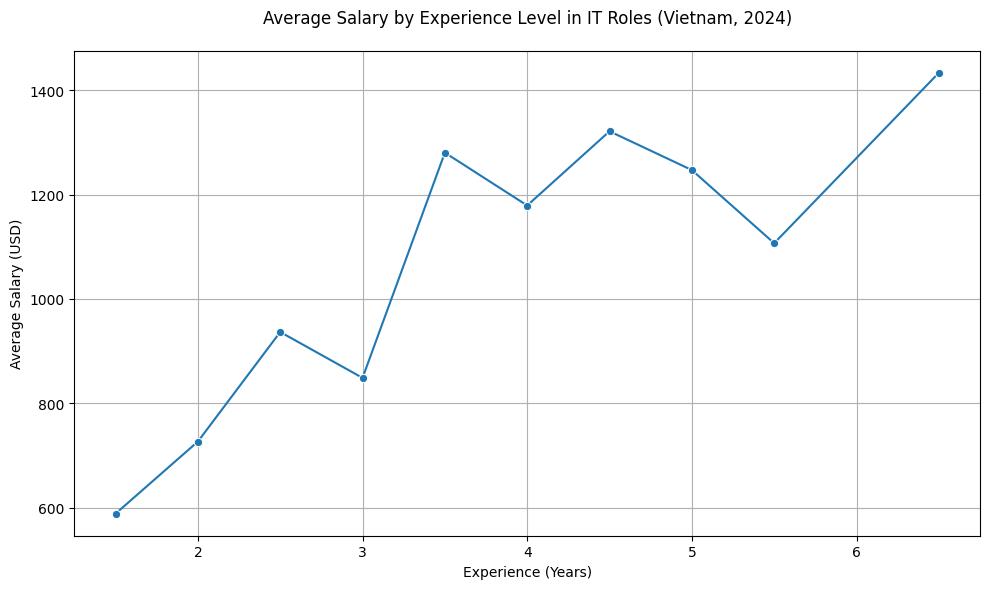


Detailed Salary Statistics by Experience Level:
                     Average Salary  Min Salary  Max Salary  \
Years of Experience                                           
12.0                        2653.06     2653.06     2653.06   
12.5                        2000.00     2000.00     2000.00   
7.5                         1614.28     1100.00     2500.00   
6.0                         1564.63     1122.45     2448.98   
8.0                         1479.59      959.18     2000.00   
9.0                         1450.00     1150.00     1750.00   
6.5                         1433.22      612.24     2150.00   
4.5                         1321.22      918.36     2448.98   
7.0                         1311.22     1122.45     1500.00   
3.5                         1280.26      510.20     5408.16   
5.0                         1246.94      632.65     2244.90   
4.0                         1179.04      632.66     1836.74   
5.5                         1106.76      850.00     2000.00   
2.5   

In [51]:
# Function to convert salary ranges to numeric values
def extract_salary(salary_str):
    if pd.isna(salary_str) or salary_str == 'Thương lượng':
        return np.nan
    try:
        salary_str = salary_str.replace('$', '').replace(',', '')
        numbers = [float(s) for s in salary_str.split('-') if s.strip().replace('.', '').isdigit()]
        return np.mean(numbers) if numbers else np.nan
    except:
        return np.nan

def extract_experience(experience_str):
    if pd.isna(experience_str):
        return np.nan
    try:
        experience_str = experience_str.lower()
        
        # Handling experience ranges like '3-5'
        if '-' in experience_str:
            numbers = [float(s) for s in experience_str.split('-') if s.strip().replace('.', '').isdigit()]
            return np.mean(numbers) if numbers else np.nan
        
        # Handling specific experience levels
        if 'junior' in experience_str:
            return 1
        elif 'mid' in experience_str or '2+ years' in experience_str:
            return 3
        elif 'senior' in experience_str or '5+ years' in experience_str:
            return 5
        elif 'lead' in experience_str or 'manager' in experience_str:
            return 7
        elif 'director' in experience_str:
            return 10
        else:
            return np.nan
    except:
        return np.nan

# Apply the function to create a new 'Experience' column
df['Years of Experience'] = df['Years of Experience'].apply(extract_experience)

# Process salary data
df['Avg_Salary'] = df['Salary Range'].apply(extract_salary)

# Remove rows with NaN experience or salary
df_cleaned = df.dropna(subset=['Years of Experience', 'Avg_Salary'])

# Calculate average salary by experience level
experience_salary = df_cleaned.groupby('Years of Experience')['Avg_Salary'].agg(['mean', 'count']).reset_index()

# Remove rows with low counts (if count <= 5)
experience_salary = experience_salary[experience_salary['count'] > 5]

# Create the visualization for experience vs salary
plt.figure(figsize=(10, 6))

# Create a line plot or scatter plot
sns.lineplot(x=experience_salary['Years of Experience'], y=experience_salary['mean'], marker='o')

# Customize the plot
plt.title('Average Salary by Experience Level in IT Roles (Vietnam, 2024)', pad=20)
plt.xlabel('Experience (Years)')
plt.ylabel('Average Salary (USD)')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print detailed statistics for experience level correlation
experience_stats = df_cleaned.groupby('Years of Experience').agg({
    'Avg_Salary': ['mean', 'min', 'max', 'count']
}).round(2)
experience_stats.columns = ['Average Salary', 'Min Salary', 'Max Salary', 'Number of Positions']
print("\nDetailed Salary Statistics by Experience Level:")
print(experience_stats.sort_values('Average Salary', ascending=False))


C:\Users\nmtho\AppData\Local\Temp\ipykernel_33936\2585471193.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=top_10_skills.index, data=top_10_skills, palette="viridis")


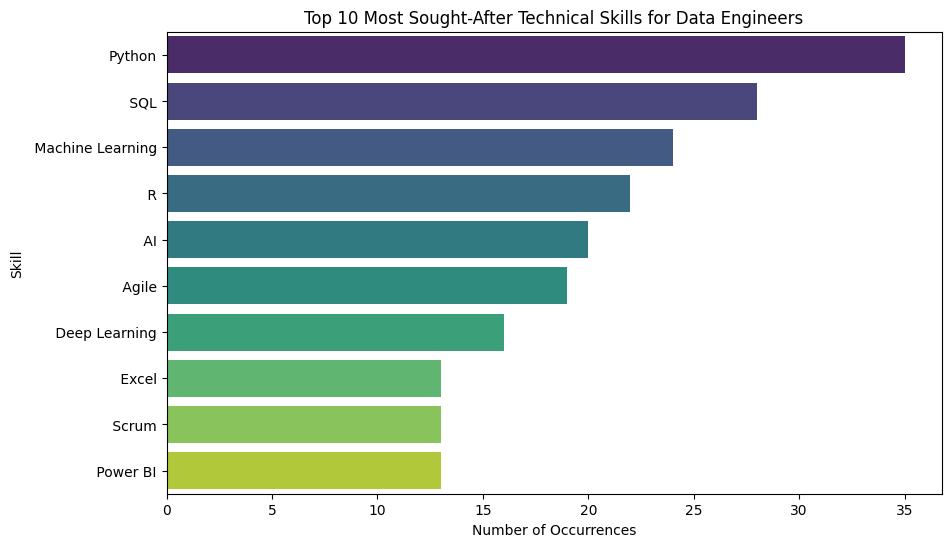

In [54]:
# Filter for Data Engineer roles
data_engineer_jobs = df[df['Role'] == 'data scientist']  # Assuming 'Data Scientist' is used for Data Engineer roles

# Extract and count required skills
all_skills = data_engineer_jobs['Required Skills'].str.split(',').explode()
skill_counts = Counter(all_skills)

# Create a DataFrame to store skills and their counts
skill_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['Count'])

# Sort skills by count in descending order
skill_df = skill_df.sort_values('Count', ascending=False)

# Visualize top 10 skills
top_10_skills = skill_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y=top_10_skills.index, data=top_10_skills, palette="viridis")
plt.xlabel('Number of Occurrences')
plt.ylabel('Skill')
plt.title('Top 10 Most Sought-After Technical Skills for Data Engineers')
plt.show()